## Graduate Rotational Internship Program: The Sparks Foundation

### Done By: Udayakiran N S

### Task 2: Prediction using Unsupervised ML 
### Query = From the given 'Iris' dataset, predict the optimum number of clusters and represent it visually

#### Dataset: https://bit.ly/3kXTdox

### Algorithm: K - Means Clustering using Elbow Method




#### Import necessary libraries

In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings as wg
wg.filterwarnings("ignore")

from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn import metrics

#### Import csv file which contains data

In [62]:
df = pd.read_csv("D:/College/TSF Intern/Task 2/Iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


#### Display the names of columns in the dataset

In [63]:
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

#### Gives overall information about dataset

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


#### Displays distinct values in a specified column

In [65]:
df['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

#### Used to display mean, SD and Five Point Summary

In [66]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


#### Removing unnecessary columns

In [67]:
data = pd.DataFrame(df)
Iris = data.drop(columns = ['Species', 'Id'])
Iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


#### To find appropriate number of clusters, we need to perform elbow method for the dataset

In [68]:
X = Iris.iloc[:, [0, 1, 2, 3]].values
Within_Cluster_Sum_Of_Squares = []
for i in range(1, 10):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    Within_Cluster_Sum_Of_Squares.append(kmeans.inertia_)

#### Plot the value of Within Cluster Sums of Squares [WCSS]

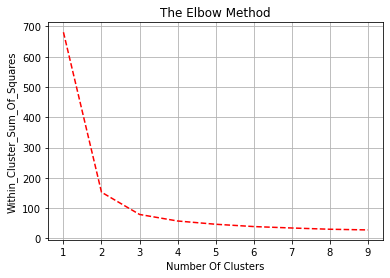

In [69]:
plt.plot(range(1, 10), Within_Cluster_Sum_Of_Squares, color = 'Red', linestyle = 'dashed')
plt.title("The Elbow Method")
plt.xlabel("Number Of Clusters")
plt.ylabel("Within_Cluster_Sum_Of_Squares")
plt.grid()
plt.show()

#### The location of bend (Knee) in the plot is considered as value for appropriate number of cluster i.e., The point after which WCSS doesn't decrease more rapidly.

#### Here the point after 3, WCSS doesn't decrease more rapidly.

### So, 3 is the optimum Number of Clusters

#### Applying K - Means to the dataset with Number of clusters = 3

In [70]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
yk = kmeans.fit_predict(X)

#### Visuvalize the Clusters

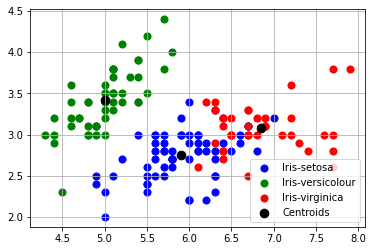

In [71]:
plt.scatter(X[yk == 0, 0], X[yk == 0, 1], 
            s = 50, c = 'blue', label = 'Iris-setosa')
plt.scatter(X[yk == 1, 0], X[yk == 1, 1], 
            s = 50, c = 'green', label = 'Iris-versicolour')
plt.scatter(X[yk == 2, 0], X[yk == 2, 1],
            s = 50, c = 'red', label = 'Iris-virginica')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
            s = 75, c = 'black', label = 'Centroids')
plt.grid()
plt.legend()
plt.show()